# Number recognition for Persian OCR

## 1. Data generation

In [1]:
import cv2
import zarnevis

In [2]:
import os # For working with directories and files

## 1.1. Generating blank image

In [3]:
import numpy as np

In [5]:
image = np.zeros((255, 255, 3), np.uint8)

In [6]:
import matplotlib.pyplot as plt

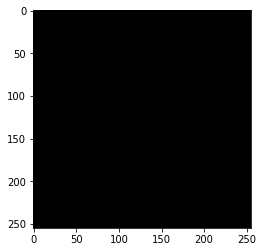

In [8]:
%matplotlib inline

plt.imshow(image)